In [1]:
# Basic MNIST extraction using PyTorch
import torch  # Main pytorch library
import torchvision  # torch library dealing with CV
from torchvision import transforms, datasets  # self-explanatory


In [2]:
train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
# This is converting our data to a tensor; Compose[list=contains all the transforms you wish to apply]

test = datasets.MNIST("", train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))
# This is converting our data to a tensor; Compose[list=contains all the transforms you wish to apply]


#Creating a dataloader to iterate over the data, eh- that's just a thing 

Shuffle=True so that the NN cannot oversimplify and give wrong answers, basically it is used to generalize the data

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)


In [4]:
for data in trainset:
    print(data)
    break


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

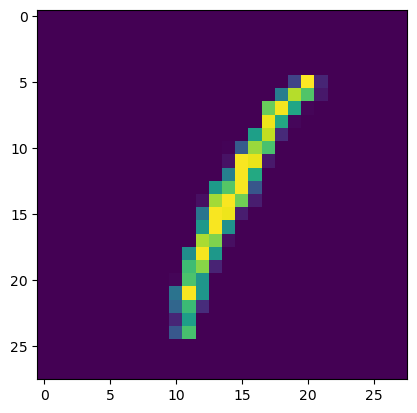

In [6]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28, 28))
plt.show()


Is the dataset balanced?

In [7]:
total = 0
counter_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
print(counter_dict)


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Building the NN!!

In [8]:
import torch.nn as nn
import torch.nn.functional as F


In [10]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()  # Initializing nn.module super-class
        self.fc1 = nn.Linear((28*28), 64)  # 64 is output
        self.fc2 = nn.Linear(64, 64)  # fc2,fc3 are hidden layers
        self.fc3 = nn.Linear(64, 64)
        # fc4 is output layer, 10 bec. we have 10 classes
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1)


net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [20]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.01)

EPOCH = 3

for epoch in range(EPOCH):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.5631, grad_fn=<NllLossBackward0>)
tensor(0.1425, grad_fn=<NllLossBackward0>)
tensor(0.2684, grad_fn=<NllLossBackward0>)


In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy ", round(correct/total, 3))


Accuracy  0.94


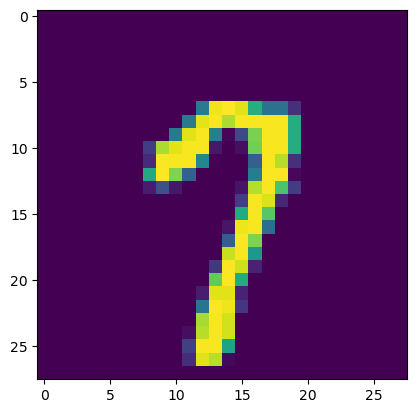

In [23]:
plt.imshow(X[0].view(28, 28))
plt.show()


In [25]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))


tensor(7)
